<a href="https://colab.research.google.com/github/dannaward/seoulbike-navigation/blob/main/%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5_%EB%94%B0%EB%A6%89%EC%9D%B4_%EA%B8%B8%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 구성



### 패키지 다운로드

그래프 시각화를 위해 networkx 라이브러리를 사용한다.

In [ ]:
import numpy as np
import pylab as plt
import networkx as nx

### 그래프 정보 입력

아래는 성균관대 인문캠 도서관부터 창경궁까지의 경로를 그려놓은 그래프다.  
경로의 경우의 수를 그래프로 표현했다.  
모두 카카오맵에서 경로 검색을 통해 획득한 실제 데이터다.

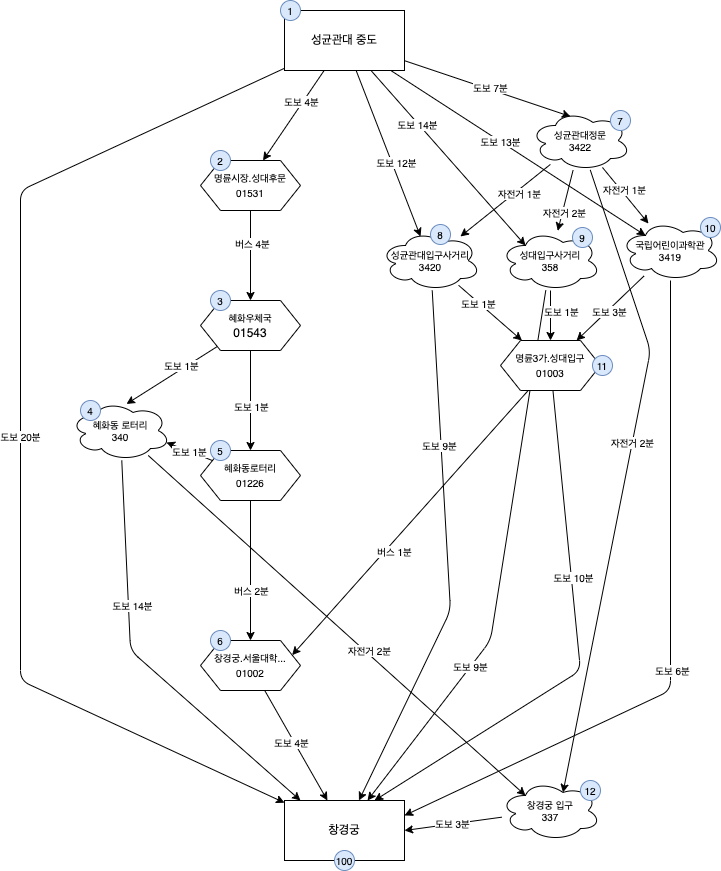

미리 그려놓은 그래프의 노드와 엣지에 맞게 그래프 데이터를 생성한다.  
그래프의 최종 goal은 100(창경궁)이다.  
points_list는 모든 `(출발지, 도착지, 소요시간, 교통수단)`을 저장한다.

In [ ]:
WALK = 1
BIKE = 2
BUS = 3
SUBWAY = 4

points_list = [(1, 100, 20, WALK), (1, 2, 4, WALK), (1, 8, 12, WALK), (1, 9, 14, WALK), (1, 10, 13, WALK), (1, 7, 7, WALK),
               (2, 3, 4, BUS), 
               (3, 4, 1, WALK), (3, 5, 1, WALK), 
               (4, 100, 14, WALK), (4, 12, 2, BIKE), 
               (5, 4, 1, WALK), (5, 6, 3, BUS), 
               (6, 100, 4, WALK), 
               (7, 8, 1, BIKE), (7, 9, 2, BIKE), (7, 10, 1, BIKE), (7, 12, 2, BIKE), 
               (8, 100, 9, WALK), (8, 11, 1, WALK), 
               (9, 11, 1, WALK), (9, 100, 9, WALK), 
               (10, 11, 3, WALK), (10, 100, 6, WALK), 
               (11, 6, 1, BUS), (11, 100, 10, WALK), 
               (12, 100, 2, WALK)]

goal = 100

### 그래프 시각화

networkx라는 툴로 위에서 입력한 그래프를 시각화했다.  
방향이 있는 그래프이므로 `DiGraph()`로 생성해주었다.  
<br/>
방향은 화살표로, 소요시간은 간선 위 라벨로 표시해주었다.

In [ ]:
def get_points_list(points):
  new_points = [(start, end, time) for start, end, time, _ in points]
  return new_points

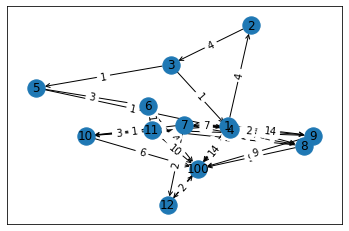

In [ ]:
G=nx.DiGraph()
G.add_weighted_edges_from(get_points_list(points_list))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos, arrows=True, arrowstyle="->")
nx.draw_networkx_labels(G,pos)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

### 보상 행렬 생성

아래는 노드 인덱스를 보상행렬을 만드는 데 사용할 수 있게 행렬 인덱스로 바꿔주는 코드다.  
1-12, 100으로 이루어진 인덱스를 0-12로 변환한다.

In [ ]:
# node index to matrix index
def convert_index(point):
  new_point = [num for num in point]
  
  for i in range(2):
    if point[i] == 100:
      new_point[i] = MATRIX_SIZE
    new_point[i] = new_point[i] - 1

  return new_point

아래는 보상에 교통수단별 선호도를 반영하기 위해 사용되는 함수다.

In [ ]:
WALK_FACTOR = 4
BIKE_FACTOR = 0.4
BUS_FACTOR = 1.1
SUBWAY_FACTOR = 1.1

def set_prefer_factor(point):
  new_point = [num for num in point]

  if point[3] == WALK:
    new_point[2] = new_point[2] * WALK_FACTOR
  elif point[3] == BIKE:
    new_point[2] = new_point[2] * BIKE_FACTOR
  elif point[3] == BUS:
    new_point[2] = new_point[2] * BUS_FACTOR
  elif point[3] == SUBWAY:
    new_point[2] = new_point[2] * SUBWAY_FACTOR
  
  return new_point


보상행렬을 생성하고, 없는 경로는 보상도 적당한 음수로 설정한다.  
최종 목적지는 보상을 100으로 설정한다.  
나머지는 소요시간, 교통수단별 선호도를 고려해 보상을 설정한다.

In [ ]:
MATRIX_SIZE = 13
NONE_PATH_CONST = -40

R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= NONE_PATH_CONST

In [ ]:
goal = MATRIX_SIZE - 1

for point in points_list:
    point = convert_index(set_prefer_factor(point))

    R[point[0], point[1]] = -point[2]

R[goal, goal] = 100

[0, 12, 80, 1]
[0, 1, 16, 1]
[0, 7, 48, 1]
[0, 8, 56, 1]
[0, 9, 52, 1]
[0, 6, 28, 1]
[1, 2, 4.4, 3]
[2, 3, 4, 1]
[2, 4, 4, 1]
[3, 12, 56, 1]
[3, 11, 0.8, 2]
[4, 3, 4, 1]
[4, 5, 3.3000000000000003, 3]
[5, 12, 16, 1]
[6, 7, 0.4, 2]
[6, 8, 0.8, 2]
[6, 9, 0.4, 2]
[6, 11, 0.8, 2]
[7, 12, 36, 1]
[7, 10, 4, 1]
[8, 10, 4, 1]
[8, 12, 36, 1]
[9, 10, 12, 1]
[9, 12, 24, 1]
[10, 5, 1.1, 3]
[10, 12, 40, 1]
[11, 12, 8, 1]


# Q-Learning

아래는 위에서 생성한 환경에 대해 Q-Learning 학습을 시키기 위한 코드다.  


In [173]:
import random

Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
alpha = 0.7
gamma = 1
epsilon = 0.0

initial_state = 1

def available_actions(state):
  current_state_row = R[state,]
  av_act = np.where(current_state_row > NONE_PATH_CONST)[1]
  return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
  next_action = int(np.random.choice(available_act,1))
  return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):  
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  # print(max_index)

  if random.random() < epsilon:
    max_index = int(np.random.choice(available_act, size = 1))
  else:
    if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
    else:
      max_index = int(max_index)
  max_value = Q[action, max_index]

  curr = Q[current_state, action]
  Q[current_state, action] = curr + (alpha * (R[current_state, action] + gamma * max_value - curr))
  # print('max_value', R[current_state, action] + gamma * max_value)
  # print(R[current_state, action])

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)


0

In [174]:
# Training
scores = []
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    # print ('Score:', str(score))
    # print('curr:', current_state, 'available:', available_act, 'act:', action, 'score: ', score)
    

학습이 끝나고 난 후 Q matrix는 다음과 같은 값들을 가진다.

In [175]:
np.set_printoptions(precision=1, suppress=True)
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.   98.2   0.    0.    0.    0.   98.6   0.    0.    0.    0.    0.
    0. ]
 [  0.    0.   98.9   0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.   99.3  98.8   0.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   99.4
    0. ]
 [  0.    0.    0.   98.8   0.   99.    0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   99.3]
 [  0.    0.    0.    0.    0.    0.    0.   98.8  98.5  96.8   0.   99.2
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   99.2   0.
   99.2]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   99.2   0.
   99.1]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   99.    0.
   99.8]
 [  0.    0.    0.    0.    0.   99.3   0.    0.    0.    0.    0.    0.
    0. ]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   99

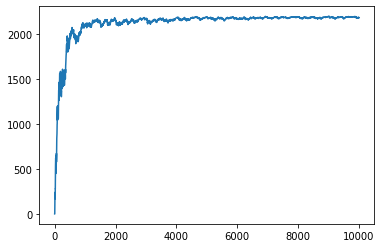

In [176]:
plt.plot(scores)
plt.show()

# Test

학습이 잘 되었는지 판단하기 위해 성균관대 인사캠 중앙도서관에서 창경궁까지 가는 길을 어떻게 안내하는지 실험해보았다.

In [177]:
current_state = 0
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

In [178]:
def find_transportation(start, end):
  for point in points_list:
    point = convert_index(point)
    if point[0] == start and point[1] == end:
      transportation = point[3]
      if transportation == 1:
        return 'WALK'
      elif transportation == 2:
        return 'BIKE'
      elif transportation == 3:
        return 'BUS'
      elif transportation == 4:
        return 'SUBWAY'
      else:
        return None

def find_time(start, end):
  for point in points_list:
    point = convert_index(point)
    if point[0] == start and point[1] == end:
      return point[2]

In [179]:
print("Most efficient path:")

for i in range(1, len(steps)):
  print(steps[i-1]+1, "->", steps[i]+1, 
        find_transportation(steps[i-1], steps[i]), 
        str(find_time(steps[i-1], steps[i])) + 'mins')

Most efficient path:
1 -> 7 WALK 7mins
7 -> 12 BIKE 2mins
12 -> 13 WALK 2mins


1) 성균관대 중앙도서관에서 정문까지 걸어가서  
2) 정문 앞 대여소에서 따릉이 탑승 후 창경궁 입구에 있는 대여소에서 내린다.  
3) 대여소에서 창경궁 안쪽까지 도보 이동한다.  
<br/>

위와 같은 결과가 나왔다.
따릉이를 여러 번 갈아타지 않고, 도보 거리도 최소화시키는 최적해다.